In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x=df[['Age']]
y=['Purchased']

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

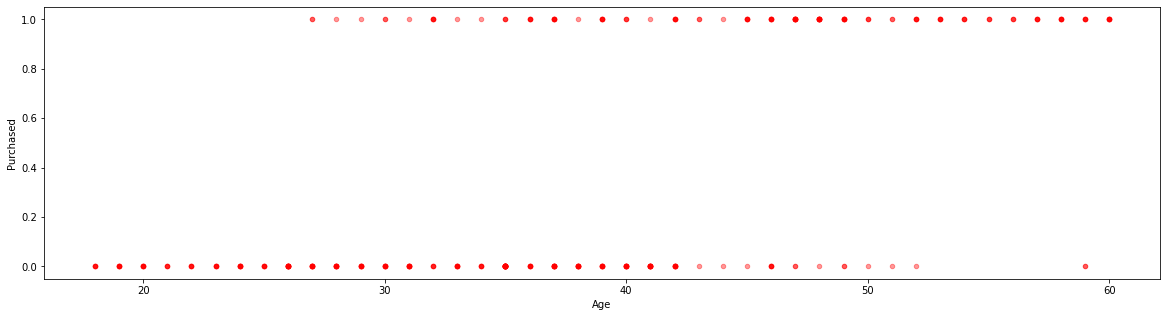

In [5]:
df.plot(kind='scatter',x='Age',y='Purchased',color='red',alpha=.4,figsize=(20,5))

In [15]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']
scaler=StandardScaler()
scaled=scaler.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(scaled,y,test_size=.2,random_state=1)
xtrain.shape,xtest.shape

((320, 2), (80, 2))

In [7]:
m=KNeighborsClassifier()
m.fit(xtrain,ytrain)

KNeighborsClassifier()

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [9]:
ypred=m.predict(xtest)

In [10]:
import seaborn as sns

[[40  8]
 [ 3 29]]


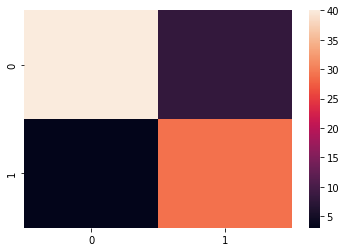

In [11]:
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,xticklabels=['0','1'],yticklabels=['0','1'])
print(cm)

In [12]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        48
           1       0.78      0.91      0.84        32

    accuracy                           0.86        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.87      0.86      0.86        80



<AxesSubplot:>

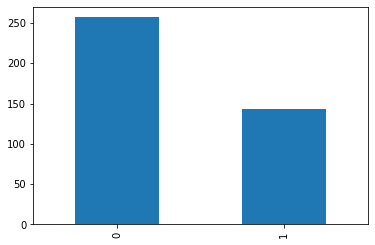

In [13]:
df.Purchased.value_counts().plot(kind='bar')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


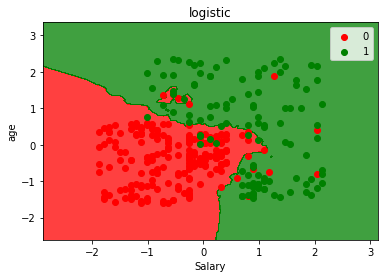

In [14]:
from utils import plot_area_distribution
plot_area_distribution(m,xtrain,ytrain,"logistic",'Salary','age')